In [15]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

## Loading and preapring data

In [8]:
# count of words which will be features
max_features = 10000
# cut recent after 500 words
maxlen = 500
batch_size = 32

In [9]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Sequences (samples x time)')

25000 train sequences
25000 test sequences
Sequences (samples x time)


In [10]:
input_train  = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("Shape of input_train: ", input_train.shape)
print("Shape of input test: ", input_test.shape)

Shape of input_train:  (25000, 500)
Shape of input test:  (25000, 500)


## The model

In [13]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 84ms/step - loss: 0.6742 - acc: 0.5688 - val_loss: 0.6204 - val_acc: 0.6612
Epoch 2/10
157/157 [==============================] - 13s 82ms/step - loss: 0.4561 - acc: 0.7945 - val_loss: 0.4722 - val_acc: 0.7732
Epoch 3/10
157/157 [==============================] - 13s 82ms/step - loss: 0.3288 - acc: 0.8641 - val_loss: 0.3753 - val_acc: 0.8422
Epoch 4/10
157/157 [==============================] - 13s 82ms/step - loss: 0.2199 - acc: 0.9154 - val_loss: 0.4908 - val_acc: 0.7804
Epoch 5/10
157/157 [==============================] - 13s 83ms/step - loss: 0.1839 - acc: 0.9284 - val_loss: 0.4454 - val_acc: 0.8368
Epoch 6/10
157/157 [==============================] - 13s 82ms/step - loss: 0.1049 - acc: 0.9639 - val_loss: 0.5610 - val_acc: 0.7892
Epoch 7/10
157/157 [==============================] - 13s 82ms/step - loss: 0.0616 - acc: 0.9811 - val_loss: 0.5231 - val_acc: 0.8338
Epoch 8/10
157/157 [==============================] - 13s 82ms

## Results

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

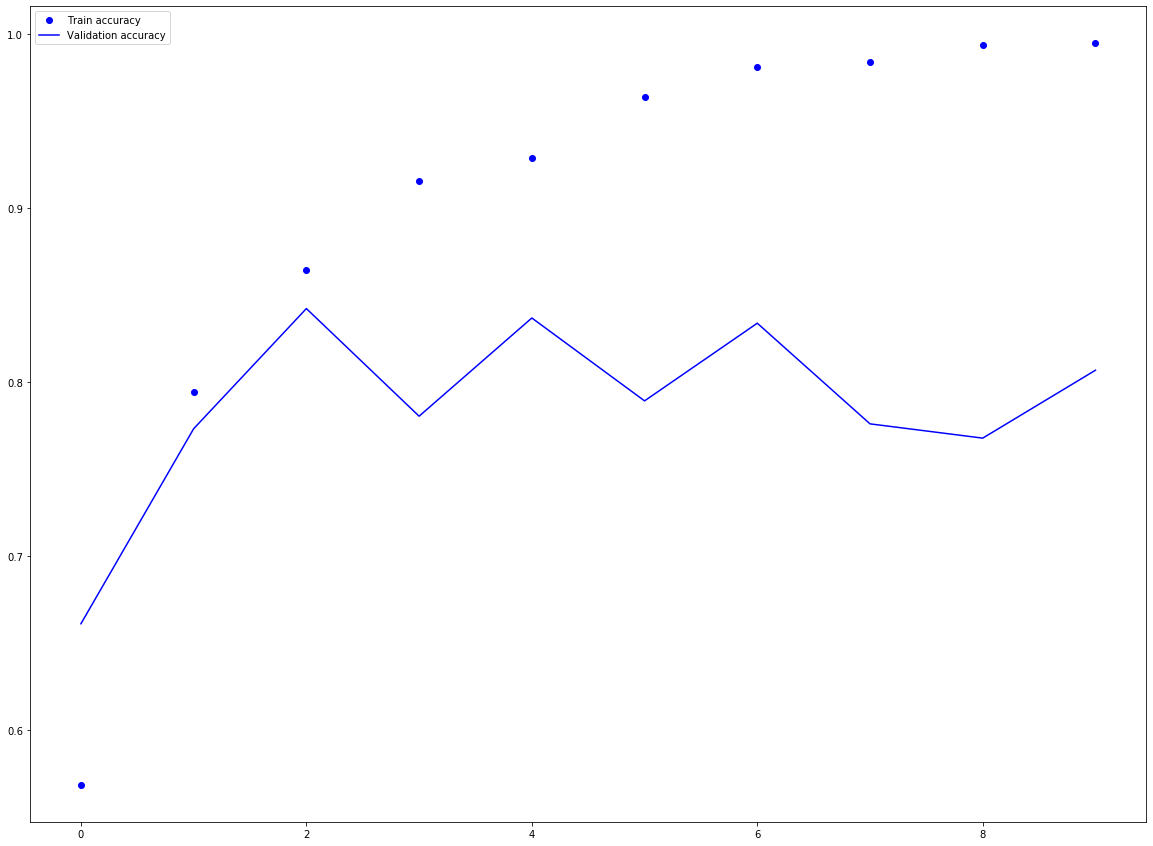

In [20]:
plt.figure(figsize=[20, 15])
plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()

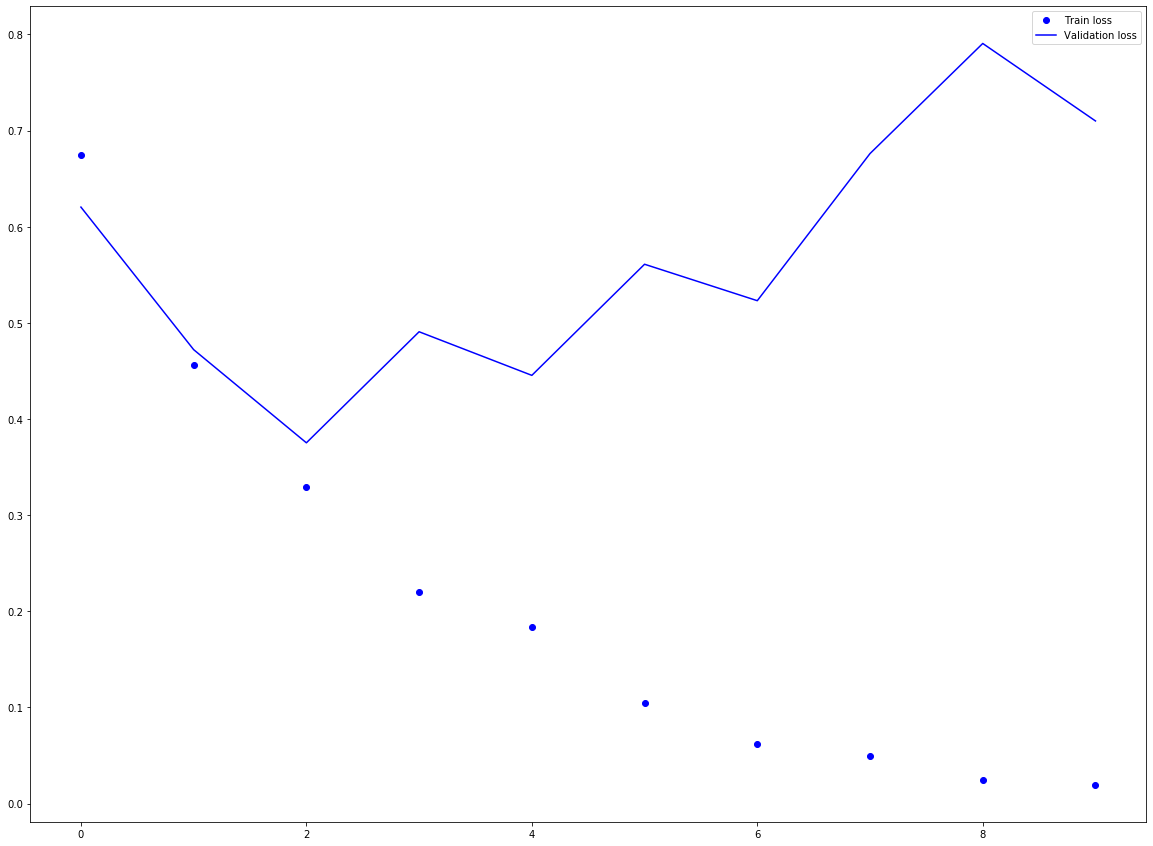

In [24]:
plt.figure(figsize=[20, 15])
plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

## LSTM Model

In [25]:
from keras.layers import LSTM

In [27]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 25s 161ms/step - loss: 0.5079 - acc: 0.7605 - val_loss: 0.3331 - val_acc: 0.8726
Epoch 2/10
157/157 [==============================] - 25s 158ms/step - loss: 0.3019 - acc: 0.8811 - val_loss: 0.2837 - val_acc: 0.8884
Epoch 3/10
157/157 [==============================] - 27s 170ms/step - loss: 0.2368 - acc: 0.9115 - val_loss: 0.2984 - val_acc: 0.8878
Epoch 4/10
157/157 [==============================] - 29s 187ms/step - loss: 0.2018 - acc: 0.9264 - val_loss: 0.2800 - val_acc: 0.8890
Epoch 5/10
157/157 [==============================] - 26s 166ms/step - loss: 0.1749 - acc: 0.9370 - val_loss: 0.2892 - val_acc: 0.8856
Epoch 6/10
157/157 [==============================] - 26s 163ms/step - loss: 0.1564 - acc: 0.9454 - val_loss: 0.3262 - val_acc: 0.8688
Epoch 7/10
157/157 [==============================] - 26s 163ms/step - loss: 0.1339 - acc: 0.9521 - val_loss: 0.4979 - val_acc: 0.8216
Epoch 8/10
157/157 [==============================] - 3

## Results

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

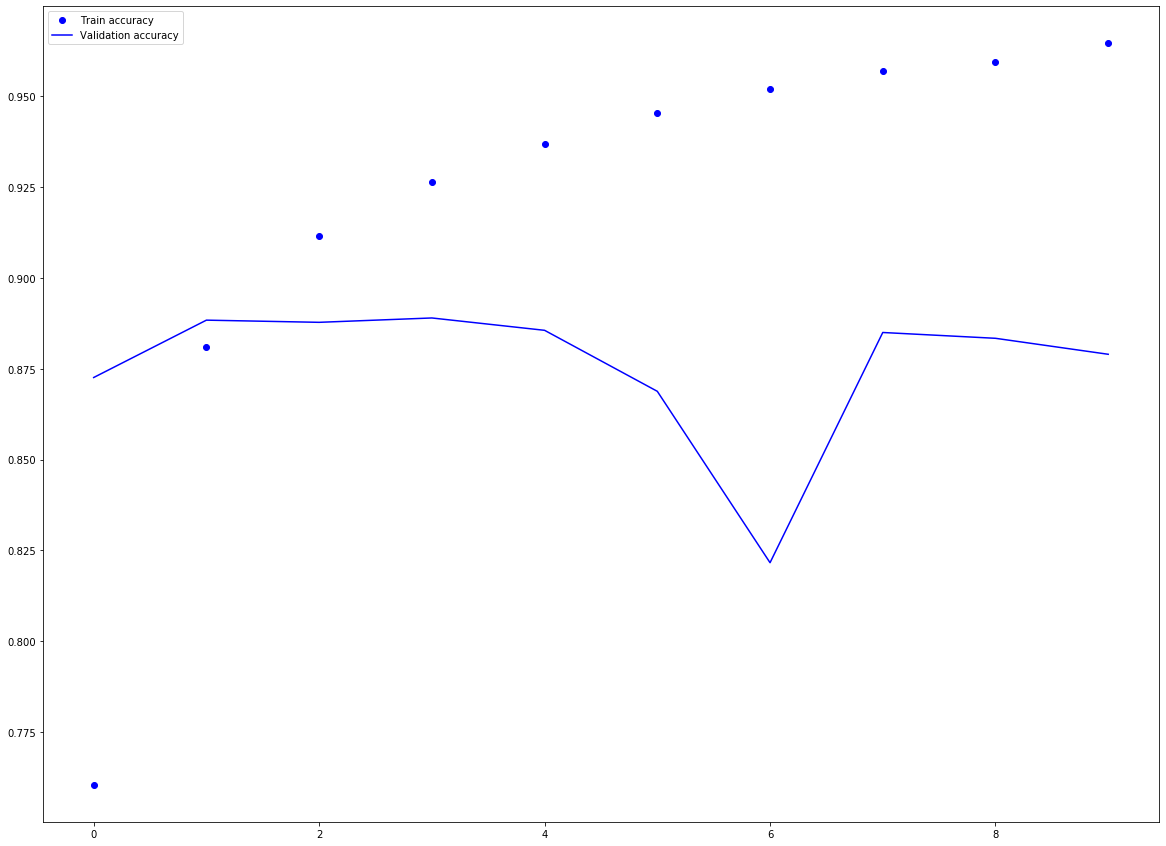

In [29]:
plt.figure(figsize=[20, 15])
plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()

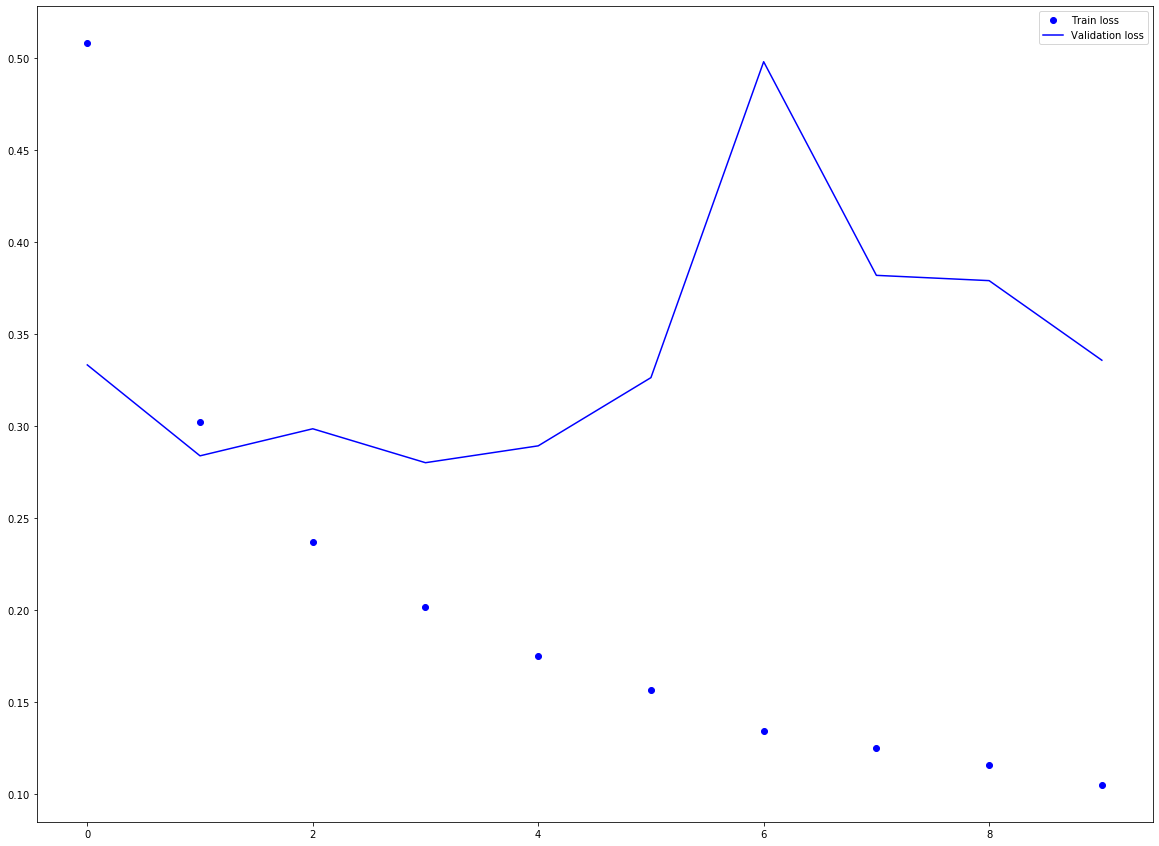

In [30]:
plt.figure(figsize=[20, 15])
plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

# SimpleRNN < LSTM
## The same model, both is RNN so why one is better than other? 
## In SimpleRNN occurs vanishing gradient problem.